In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split

In [2]:
x=pd.read_csv(r'Diabetes_XTrain.csv')
y=pd.read_csv(r'Diabetes_YTrain.csv')
test=pd.read_csv(r'Diabetes_XTest.csv')
X=test.values

In [3]:
x_val=x.values
y_val=y.values
print(x.shape,y.shape)

(576, 8) (576, 1)


In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

(518, 8) (518, 1) (58, 8) (58, 1)


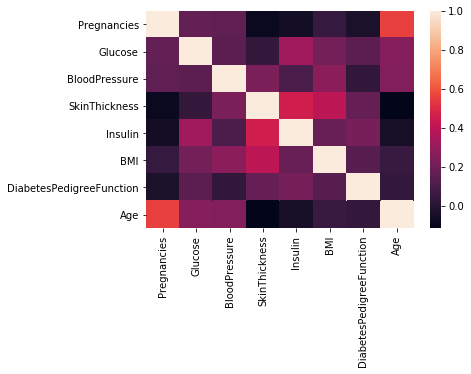

In [5]:
#Correlation analysis
sns.heatmap(x.corr())

In [6]:
data=pd.merge(x,y,on=None,right_index=True,left_index=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0
...,...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23,0
572,7,187,68,39,304,37.7,0.254,41,1
573,2,122,60,18,106,29.8,0.717,22,0
574,4,154,72,29,126,31.3,0.338,37,0


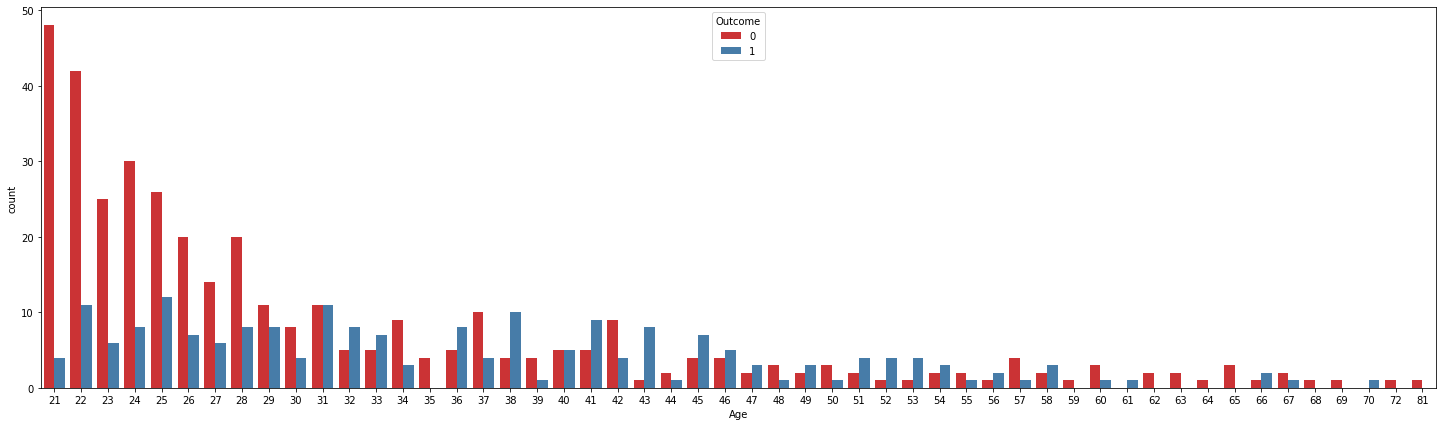

In [7]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

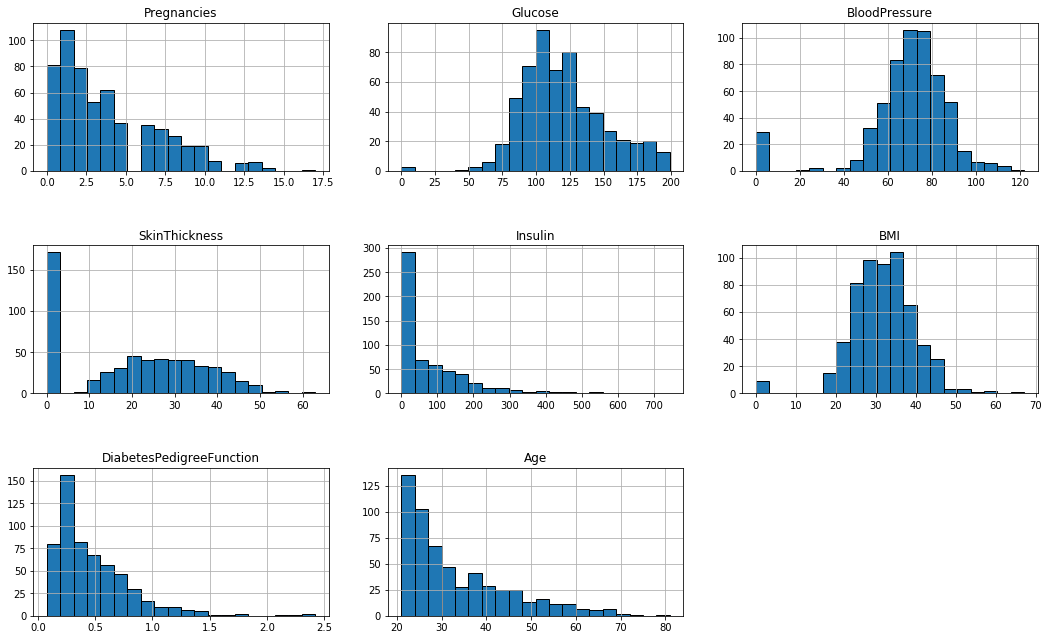

In [8]:
#analysis of all data
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

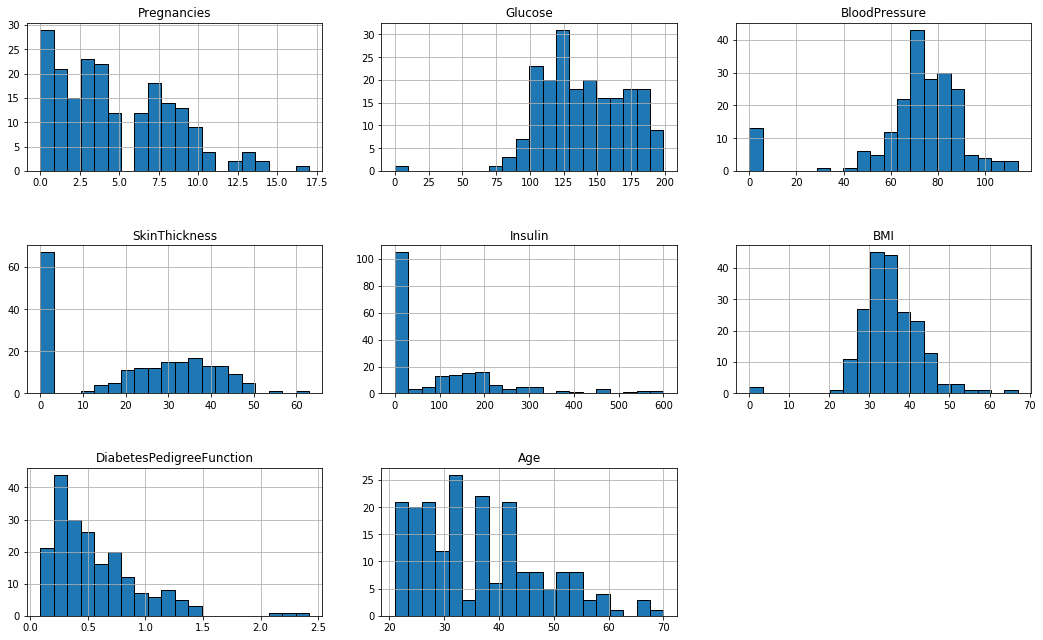

In [9]:
#analysis of diabetes cases
diab1=data[data['Outcome']==1]
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [10]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [11]:
def knn(x,y,query,k=5):
    values=[]
    for i in range(x.shape[0]):
        d=distance(x[i],query)
        values.append((d,y[i]))
    values=sorted(values)
    values=values[:k]
    values=np.array(values)
    data=np.unique(values,return_counts=True)
    index=data[1].argmax()
    return data[0][index]

In [12]:
Y=[]
for i in range(x_test.shape[0]):
    pred=knn(x_train,y_train,x_test[i])
    Y.append(pred)
print('Accuracy',((y_test==Y).sum())/y_test.shape[0])


Accuracy 0.7068965517241379


In [13]:
y_pred=[]
for i in range(X.shape[0]):
    y_pred.append(knn(x_val,y_val,X[i]))

In [14]:
y_pred=pd.DataFrame(y_pred,columns=['Outcome'])
y_pred

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,1
188,0
189,1
190,1


In [15]:
y_final=[]
y_pred=np.array(y_pred)
for i in range(y_pred.shape[0]):
    if(y_pred[i]==0):
        y_final.append('Non-Diabetic')
    else:
        y_final.append('Diabetic')
y=pd.DataFrame(y_final,columns=['Outcome'])

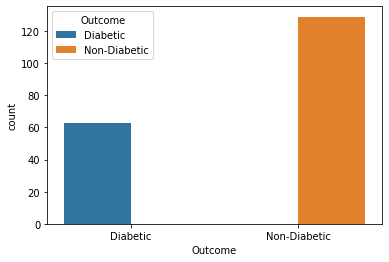

In [16]:
axs=sns.countplot(x='Outcome',hue='Outcome',data=y)
plt.show()

In [17]:
y=pd.DataFrame(y,columns=['Outcome'])
data=pd.merge(test,y,on=None,right_index=True,left_index=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,Diabetic
1,2,93,64,32,160,38.0,0.674,23,Non-Diabetic
2,2,114,68,22,0,28.7,0.092,25,Non-Diabetic
3,13,76,60,0,0,32.8,0.180,41,Non-Diabetic
4,1,80,74,11,60,30.0,0.527,22,Non-Diabetic
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,Diabetic
188,3,130,64,0,0,23.1,0.314,22,Non-Diabetic
189,0,162,76,36,0,49.6,0.364,26,Diabetic
190,12,84,72,31,0,29.7,0.297,46,Diabetic


In [18]:
data.to_csv('Predicted_data.csv')